# 📌 **RNN (Recurrent Neural Network) – Short Definition**

🔁 **RNN** is a type of neural network that is used for **sequence data** (like time series, text, or speech).
It remembers the **previous inputs** using loops to help make better predictions.

---

# 🧠✨ **Key Concepts of RNN**

## 🧩 1. **Sequential Data Handling**

* RNNs are designed for **data with order** (e.g., words in a sentence, stock prices over time).

## 🔄 2. **Memory of Previous Steps**

* It keeps **memory** of earlier steps using a **hidden state**.
* Output at time step *t* depends on the input at *t* and hidden state from *t-1*.

## 📉 3. **Vanishing Gradient Problem**

* When training long sequences, RNNs may struggle to **remember long-term dependencies** due to **vanishing gradients**.

## 🧱 4. **Structure**

* Repeats the **same network cell** for each time step.
* Each cell passes its info to the next.

## 📚 5. **Applications**

* 🗣️ Speech Recognition
* 📝 Text Generation
* 🕰️ Time Series Prediction
* 🎶 Music Composition



## 🔧 **Variations of RNN**

* ⏳ **LSTM (Long Short-Term Memory)** – solves memory problems
* 🚪 **GRU (Gated Recurrent Unit)** – simpler version of LSTM



## 🛠️ **Tools & Libraries**

* 🐍 Python
* 🔧 TensorFlow / PyTorch / Keras




In [43]:
# LOADING DATA:
import pandas as pd
DATA_TRAIN=pd.read_csv(r"C:\Users\Nagesh Agrawal\OneDrive\Desktop\6_MACHINE LEARNING\1_DATASETS\ANN_DATA\RNN_TRAIN.csv")
DATA_TEST=pd.read_csv(r"C:\Users\Nagesh Agrawal\OneDrive\Desktop\6_MACHINE LEARNING\1_DATASETS\ANN_DATA\RNN_TEST.csv")
DATA_TRAIN.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [29]:
DATA_TRAIN["date"]=pd.to_datetime(DATA_TRAIN["date"])

In [30]:
DATA_TRAIN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [31]:
# 🎯 Features and Target
features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
target = 'meantemp'

In [32]:
# 🔄 Normalize features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(DATA_TRAIN[features])


---

## 🔁 **What is "Create Sequence" in RNN?**

🧠 **RNNs** learn from **sequences** of data — like learning patterns from **past values** to predict the **next value**.



## 📦 Imagine this Temperature Data:

| Day | Temp |
| --- | ---- |
| 1   | 21   |
| 2   | 22   |
| 3   | 23   |
| 4   | 24   |
| 5   | 25   |
| 6   | 26   |



## 🧩 **Creating Sequences (sequence length = 3)**

We break the data like this:

| Input (X)     | Output (y) |
| ------------- | ---------- |
| \[21, 22, 23] | 24         |
| \[22, 23, 24] | 25         |
| \[23, 24, 25] | 26         |

🔁 This means:

> Use 3 past days to **predict** the next day's temperature.



## 🧠 RNN Learns:

* That when the pattern is `[21, 22, 23]` → the next is likely `24`.
* So, it's learning the **trend or pattern over time**.



## 💡In Code:

```python
for i in range(len(data) - sequence_length):
    X.append(data[i:i+sequence_length])
    y.append(data[i+sequence_length])
```

This loop:

* Takes chunks of length `sequence_length` from the data ➡️ X
* Takes the next value after that ➡️ y




In [33]:
# ⏱️ Create sequences
import numpy as np
X = []
y = []
sequence_length = 5

for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i+sequence_length])
    y.append(scaled_data[i+sequence_length][0])  # Predicting 'meantemp'

X = np.array(X)
y = np.array(y)

In [34]:
# 🧠 Build RNN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


model = Sequential()
model.add(SimpleRNN(64, activation='relu', input_shape=(sequence_length, len(features))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 🏋️ Train the model
model.fit(X, y, epochs=100, verbose=0)

# 🔮 Predict
predicted = model.predict(X)

c:\Users\Nagesh Agrawal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [35]:
# 🧮 Convert predictions back to real temperature
# Only inverse transform meantemp (column 0)
meantemp_scaler = MinMaxScaler()
meantemp_scaler.min_, meantemp_scaler.scale_ = scaler.min_[0], scaler.scale_[0]
predicted_actual = meantemp_scaler.inverse_transform(predicted.reshape(-1, 1))
y_actual = meantemp_scaler.inverse_transform(y.reshape(-1, 1))

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# y_actual and predicted_actual are your true and predicted temps (in original scale)

mse = mean_squared_error(y_actual, predicted_actual)
mae = mean_absolute_error(y_actual, predicted_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, predicted_actual)

print(f"📊 Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


📊 Model Evaluation Metrics:
Mean Squared Error (MSE): 2.0291
Mean Absolute Error (MAE): 1.0860
Root Mean Squared Error (RMSE): 1.4245
R² Score: 0.9618


c:\Users\Nagesh Agrawal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


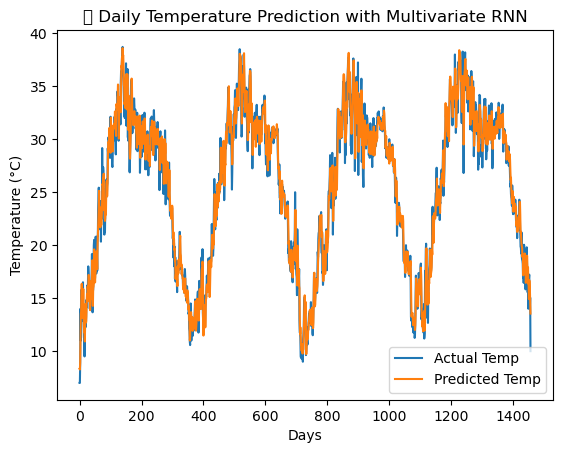

In [36]:
# 📊 Plot results
import matplotlib.pyplot as plt
plt.plot(y_actual, label='Actual Temp')
plt.plot(predicted_actual, label='Predicted Temp')
plt.title('🌡️ Daily Temperature Prediction with Multivariate RNN')
plt.xlabel('Days')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [37]:
new_data = [[25.0, 60, 2.5, 1010]]  # [meantemp, humidity, wind_speed, meanpressure]


In [38]:
new_sequence = [
    [24.5, 65, 2.2, 1012],
    [24.8, 63, 2.3, 1011],
    [25.0, 60, 2.5, 1010],
    [25.2, 59, 2.6, 1010],
    [25.4, 58, 2.8, 1009]
]  # Last 5 days of data


In [45]:
scaled_sequence = scaler.transform(new_sequence)
scaled_sequence

c:\Users\Nagesh Agrawal\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.56550218, 0.59570957, 0.05210801, 0.13212602],
       [0.57467249, 0.57260726, 0.05447655, 0.13199586],
       [0.58078603, 0.5379538 , 0.05921364, 0.13186569],
       [0.58689956, 0.52640264, 0.06158219, 0.13186569],
       [0.5930131 , 0.51485149, 0.06631928, 0.13173552]])

In [46]:
X_new = np.array(scaled_sequence).reshape(1, 5, 4)
X_new

array([[[0.56550218, 0.59570957, 0.05210801, 0.13212602],
        [0.57467249, 0.57260726, 0.05447655, 0.13199586],
        [0.58078603, 0.5379538 , 0.05921364, 0.13186569],
        [0.58689956, 0.52640264, 0.06158219, 0.13186569],
        [0.5930131 , 0.51485149, 0.06631928, 0.13173552]]])

In [47]:
predicted_scaled = model.predict(X_new)
predicted_scaled

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


array([[0.5799523]], dtype=float32)

In [42]:
predicted_temp = meantemp_scaler.inverse_transform(predicted_scaled)
print("🌡️ Predicted Next Day Temperature:", predicted_temp[0][0], "°C")


🌡️ Predicted Next Day Temperature: 24.972725 °C



### 🧠 Summary:

| Step | Action                       |
| ---- | ---------------------------- |
| 📦   | Prepare last 5 days of input |
| 🔄   | Scale it with same scaler    |
| 📐   | Reshape to 3D                |
| 🔮   | Predict using `.predict()`   |
| 🔁   | Inverse transform to get °C  |



# **🚀 Predicting the next 7 days with an RNN involves a process called recursive forecasting**

In [50]:
import numpy as np

# Assume you have the last 5 days of real data as 'last_sequence'
last_sequence = [
    [25.4, 58, 2.8, 1009],
    [25.6, 57, 2.7, 1008],
    [25.7, 56, 2.9, 1007],
    [25.8, 55, 3.0, 1007],
    [26.0, 54, 3.1, 1006]
]

# Scale last_sequence
scaled_seq = scaler.transform(last_sequence)

predicted_days = []


for _ in range(7):  # predict next 7 days
    X_input = scaled_seq.reshape(1, 5, 4)
    pred_scaled = model.predict(X_input)
    
    # Inverse scale to get temperature only
    pred_temp = meantemp_scaler.inverse_transform(pred_scaled)[0][0]
    predicted_days.append(pred_temp)
    
    # Create new input sequence for next prediction:
    # Remove the first day, append the predicted day with other features
    # Here, we only predicted 'meantemp', so for other features you can:
    # Option 1: Assume they stay the same as last day (simple approach)
    # Option 2: Use some domain knowledge or separate models to predict them
    
    # Simple approach:
    new_day = scaled_seq[-1].copy()  # last day features scaled
    new_day[0] = pred_scaled  # replace meantemp with predicted scaled value
    
    # Update the sequence
    scaled_seq = np.vstack([scaled_seq[1:], new_day])

# Print predicted temperatures for next 7 days
for i, temp in enumerate(predicted_days, 1):
    print(f"Day +{i} predicted temperature: {temp:.2f} °C")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

c:\Users\Nagesh Agrawal\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


C:\Users\Nagesh Agrawal\AppData\Local\Temp\ipykernel_15444\1968886917.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_day[0] = pred_scaled  # replace meantemp with predicted scaled value
C:\Users\Nagesh Agrawal\AppData\Local\Temp\ipykernel_15444\1968886917.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_day[0] = pred_scaled  # replace meantemp with predicted scaled value


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


C:\Users\Nagesh Agrawal\AppData\Local\Temp\ipykernel_15444\1968886917.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_day[0] = pred_scaled  # replace meantemp with predicted scaled value
C:\Users\Nagesh Agrawal\AppData\Local\Temp\ipykernel_15444\1968886917.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_day[0] = pred_scaled  # replace meantemp with predicted scaled value


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

C:\Users\Nagesh Agrawal\AppData\Local\Temp\ipykernel_15444\1968886917.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_day[0] = pred_scaled  # replace meantemp with predicted scaled value


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

C:\Users\Nagesh Agrawal\AppData\Local\Temp\ipykernel_15444\1968886917.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_day[0] = pred_scaled  # replace meantemp with predicted scaled value


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Day +1 predicted temperature: 25.52 °C
Day +2 predicted temperature: 25.24 °C
Day +3 predicted temperature: 25.00 °C
Day +4 predicted temperature: 24.90 °C
Day +5 predicted temperature: 24.71 °C
Day +6 predicted temperature: 24.50 °C
Day +7 predicted temperature: 24.27 °C


C:\Users\Nagesh Agrawal\AppData\Local\Temp\ipykernel_15444\1968886917.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_day[0] = pred_scaled  # replace meantemp with predicted scaled value
